# Lab21 : CNN Classification.
Realisé par : Mohammed Bousmah EMSI 2024-2025

## Reference : 
Dataset !wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip



In [2]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [3]:
!unzip fruits.zip

'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

# Step 1 : Dataset

In [5]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


### Dataset visualization

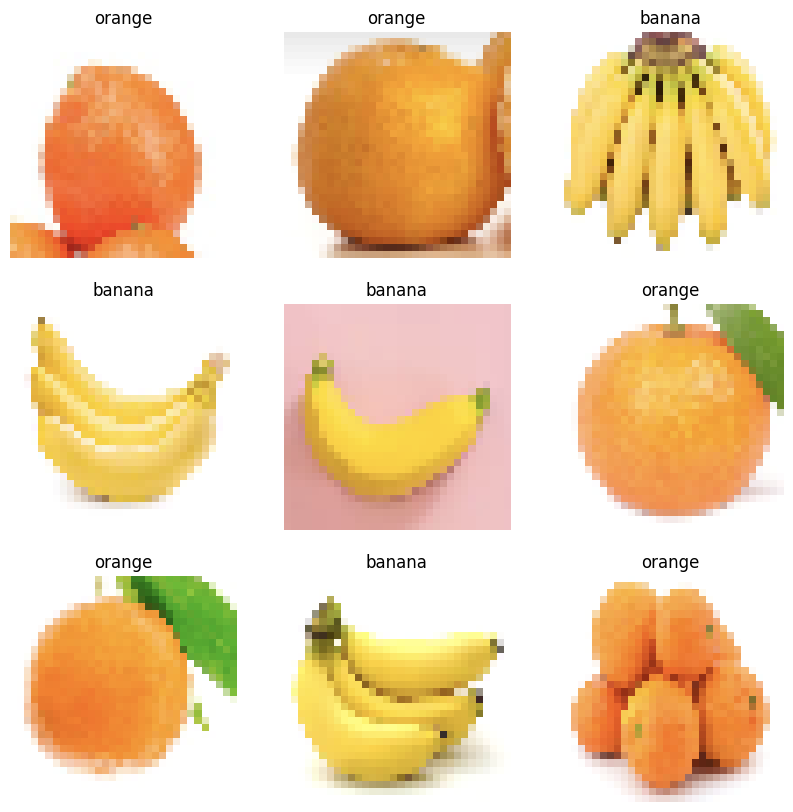

In [6]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

# Step 2 : Model

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255), # Normalization (Values betweeen 0 & 1)
     tf.keras.layers.Conv2D(32, 3, activation="relu"), # 32 Pixels from smaller scan
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3) #3 Classes
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

# Step 3 : Train

In [8]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3769 - loss: 1.0846 - val_accuracy: 0.6212 - val_loss: 0.9000
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6896 - loss: 0.8187 - val_accuracy: 0.6212 - val_loss: 0.6615
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7352 - loss: 0.5912 - val_accuracy: 0.8788 - val_loss: 0.3700
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8751 - loss: 0.3261 - val_accuracy: 0.8030 - val_loss: 0.3707
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9125 - loss: 0.2362 - val_accuracy: 0.9091 - val_loss: 0.1996
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9262 - loss: 0.2115 - val_accuracy: 0.9091 - val_loss: 0.1998
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9232 - loss: 0.1727 - val_accuracy: 0.9545 - val_loss: 0.1532
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9390 - loss: 0.1754 - val_accuracy: 0.9091 - v

# Step 4 : Test

In [9]:
print(model.evaluate(test_ds)) # score and accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9524 - loss: 0.1641
[0.18507568538188934, 0.9461538195610046]


## Test visualization

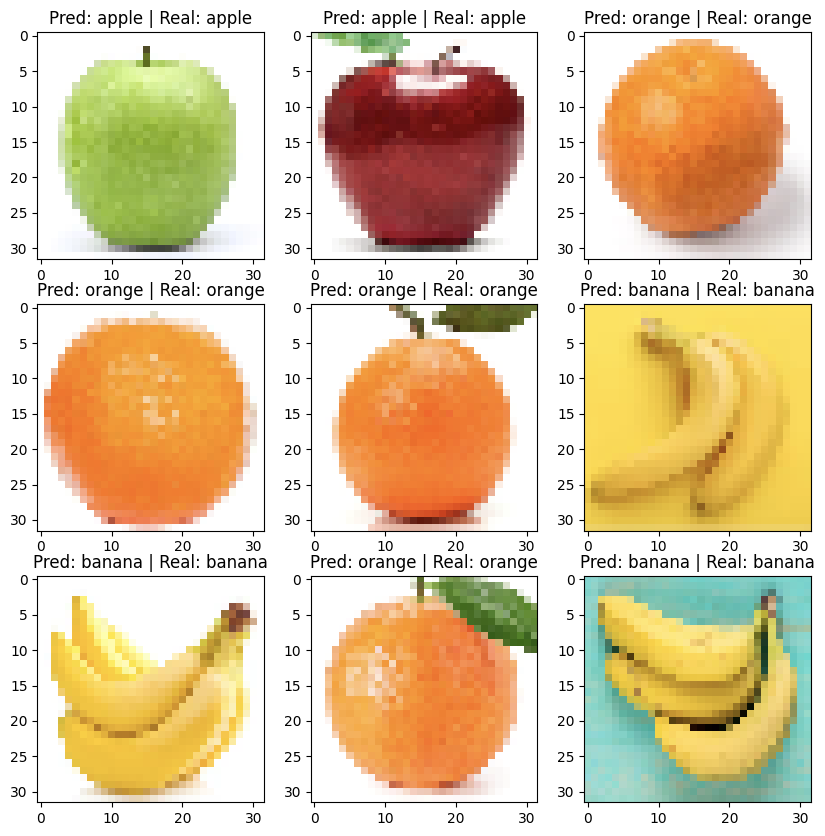

In [10]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])
plt.show()



# Save the MODEL

In [11]:
model.save('model.h5')